# Escuela de verano de CCC y PLN CIC-IPN 2023

Desarrollado por: Ericka Deyanira Ovando B

Taller: Lingüística cognitiva un área a considerar en las CCC

Para este ejercicio se considera que  S1, S2, S3 ... Sn

son oraciónes, cada una contiene al menos un verbo y dos sustantivos, están escritas en español y se siguen los siguientes pasos para el analisis semantico:

Preprocesing: pasar a minusculas toda la oración.

1.   Analisis POS con stanza
2.   Traducción de dos sustantivos y verbo
3.   Comparación con wordnet (sust1, verbo), (sust1, sust2), (sust2, verbo)
4.   Si alguno de los resultados de similitud son superiores a 0.5 se puede interpretar que existe una relación  semántica, si la similitud es menor se puede entender que dicha relación semántica es muy baja y probablemente exista cierta inovación semántica en esta oración.





## Instalar paquetes necesarios:

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.app.wordnet_app import lemma_property
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

Para usar nltk

In [ ]:
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

Para utilizar stanza:

In [ ]:
# Install; note that the prefix "!" is not needed if you are running in a terminal
!pip install stanza

# Import the package
import stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 12.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=45d5576487977c2a2b07bedf43806dcc529ceefb5ef80287443debe90034680a
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji


In [ ]:
# Download an English model into the default directory
print("Descargar modelo en español")
stanza.download('es')

Descargar modelo en español


INFO:stanza:Downloading default packages for language: es (Spanish) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


In [ ]:
print("Pipeline en español..")
es_nlp = stanza.Pipeline('es')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Pipeline en español..


INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package  |
---------------------------
| tokenize     | ancora   |
| mwt          | ancora   |
| pos          | ancora   |
| lemma        | ancora   |
| constituency | combined |
| depparse     | ancora   |
| sentiment    | tass2020 |
| ner          | conll02  |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Para utilizar google translate

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=2f6bdacf773ab3dd425a9a6e94a47cb739f1673db0d15c049b3599256bab678f
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling cha

Para utilizar Transformers

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.8 MB/s eta 0:00:00


In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=f89d93f3d7224d0a3988a8d39d38175292a7c0c8fa0a4d1a7abdb192066b13a5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
!pip install the requirements
!pip install nltk
!python -m nltk.downloader book
!python -m nltk.downloader cess_esp

  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement requirements (from versions: none)
ERROR: No matching distribution found for requirements
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 


# Preprocesing: pasar a minusculas toda la oración y analisis POS con stanza

La lematización es un proceso lingüístico que consiste en, dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente.

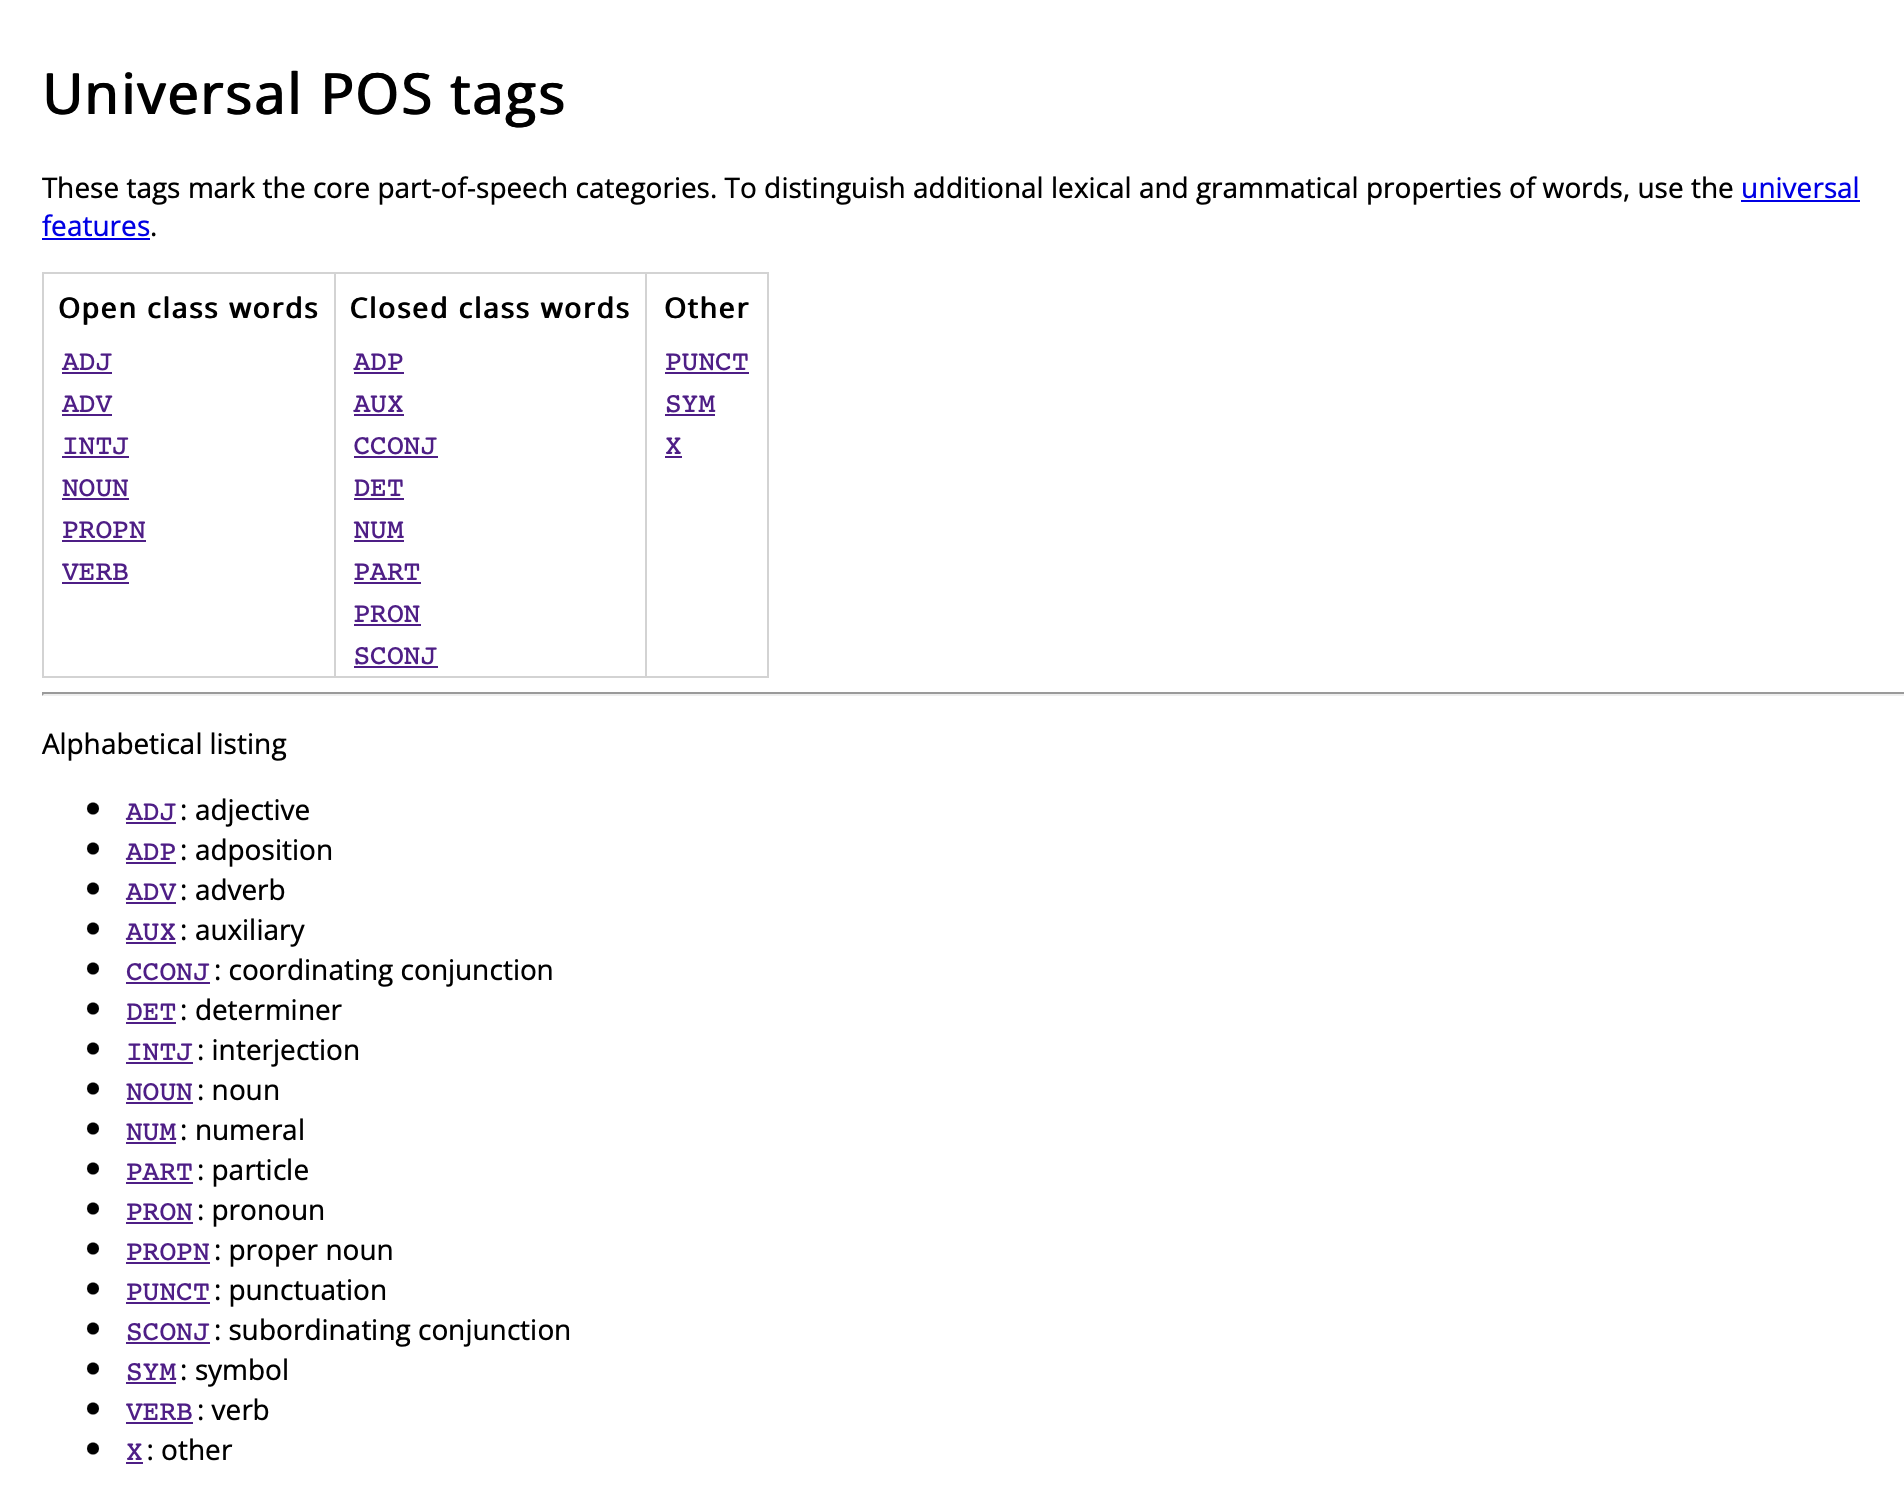

In [ ]:
def detect_VorN(sentence): #detectar verbos o sustantivos
  nouns= []
  verbs= []
  en_doc = es_nlp(sentence.lower()) #se analiza la oración en minusculas
  for i, sent in enumerate(en_doc.sentences):
    print("[Sentence {}]".format(i+1))
    for word in sent.words:
      if word.pos=='NOUN': nouns.append(word.text)
      if word.pos=='VERB': verbs.append(word.text)
      print("{:12s}\t{:12s}\t{:6s}".format(\
            word.text, word.lemma, word.pos)) # \t{:d}\t{:12s} word.head, word.deprel))
    print("")
    return nouns, verbs

In [ ]:
n, v= detect_VorN('Todos sabemos que cada minuto sólo dura 60 segundos. ')


[Sentence 1]
todos       	todo        	PRON  
sabemos     	saber       	VERB  
que         	que         	SCONJ 
cada        	cada        	DET   
minuto      	minuto      	NOUN  
sólo        	sólo        	ADV   
dura        	durar       	VERB  
60          	60          	NUM   
segundos    	segundo     	NOUN  
.           	.           	PUNCT 



In [ ]:
n, v= detect_VorN('Todos sabemos que el tiempo es oro')


[Sentence 1]
todos       	todo        	PRON  
sabemos     	saber       	VERB  
que         	que         	SCONJ 
el          	el          	DET   
tiempo      	tiempo      	NOUN  
es          	ser         	AUX   
oro         	oro         	NOUN  



In [ ]:
print(n)

['tiempo', 'oro']


## Traducción

In [ ]:
from googletrans import Translator

translator = Translator()
def traducir (palabra):
  x= translator.translate(palabra , src= 'es', dest ='english')
  return x.text

traducir('tu')

'you'

# Wordnet

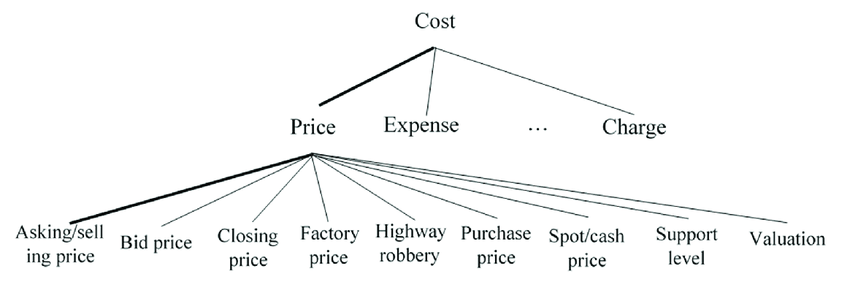

WordNet es la base de datos léxica, es decir, un diccionario para el idioma inglés, diseñado específicamente para el procesamiento del lenguaje natural.

Synset es un tipo especial de interfaz simple que está presente en NLTK para buscar palabras en WordNet. Las instancias Synset son las agrupaciones de palabras sinónimas que expresan el mismo concepto. Algunas de las palabras tienen solo un Synset y otras tienen varios.

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
synsets_bank = wn.synsets('bank')              # Obtención de todos los synsets a partir de una palabra en ingles
print(type(synsets_bank[0]))                   # Mostramos el tipo de un synset
print(synsets_bank)

<class 'nltk.corpus.reader.wordnet.Synset'>
[Synset('bank.n.01'), Synset('depository_financial_institution.n.01'), Synset('bank.n.03'), Synset('bank.n.04'), Synset('bank.n.05'), Synset('bank.n.06'), Synset('bank.n.07'), Synset('savings_bank.n.02'), Synset('bank.n.09'), Synset('bank.n.10'), Synset('bank.v.01'), Synset('bank.v.02'), Synset('bank.v.03'), Synset('bank.v.04'), Synset('bank.v.05'), Synset('deposit.v.02'), Synset('bank.v.07'), Synset('trust.v.01')]


Descripción de todos los synsets y sus respectivas definiciones

In [ ]:

for synset in synsets_bank:                       # Para todos los synsets en la lista 'synsets_bank'
    print(synset, synset.definition())            # El método 'definition' nos devuelve la definición en forma de glosa

Synset('bank.n.01') sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01') a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03') a long ridge or pile
Synset('bank.n.04') an arrangement of similar objects in a row or in tiers
Synset('bank.n.05') a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06') the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07') a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09') a building in which the business of banking transacted
Synset('bank.n.10') a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
Synset('bank.v.01') tip laterally
Sy

Obtención de todos los synsets a partir de una palabra

In [ ]:
synsets_bank = wn.synsets('bank')
print(type(synsets_bank[0]))                   # Mostramos el tipo de un synset
print(synsets_bank)                            # Mostramos la lista de synsets

<class 'nltk.corpus.reader.wordnet.Synset'>
[Synset('bank.n.01'), Synset('depository_financial_institution.n.01'), Synset('bank.n.03'), Synset('bank.n.04'), Synset('bank.n.05'), Synset('bank.n.06'), Synset('bank.n.07'), Synset('savings_bank.n.02'), Synset('bank.n.09'), Synset('bank.n.10'), Synset('bank.v.01'), Synset('bank.v.02'), Synset('bank.v.03'), Synset('bank.v.04'), Synset('bank.v.05'), Synset('deposit.v.02'), Synset('bank.v.07'), Synset('trust.v.01')]


Descripción de todos los synsets

In [ ]:

for synset in synsets_bank:                       # Para todos los synsets en la lista 'synsets_bank'
    print(synset, synset.definition())            # El método 'definition' nos devuelve la definición en forma de glosa

Synset('bank.n.01') sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01') a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03') a long ridge or pile
Synset('bank.n.04') an arrangement of similar objects in a row or in tiers
Synset('bank.n.05') a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06') the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07') a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09') a building in which the business of banking transacted
Synset('bank.n.10') a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
Synset('bank.v.01') tip laterally
Sy

Podemos obtener de un synset: sinonimos, lemas y significado

In [ ]:

# Segundo synset de la lista asociada a 'bank'. Su significado es entidad bancaria
entidad_bancaria = synsets_bank[1]

# Lemas asociados a ese synset (palabras sinónimas)
print(entidad_bancaria.lemmas())

# Ejemplos de uso del lema 'bank' con este significado
print(entidad_bancaria.examples())

[Lemma('depository_financial_institution.n.01.depository_financial_institution'), Lemma('depository_financial_institution.n.01.bank'), Lemma('depository_financial_institution.n.01.banking_concern'), Lemma('depository_financial_institution.n.01.banking_company')]
['he cashed a check at the bank', 'that bank holds the mortgage on my home']


Descarga de Open Multilingual WordNet

In [ ]:

nltk.download('omw')

[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [ ]:
def calcula_sinonimos(palabra, idioma='eng'):
    ''' Función que calcula las palabras sinónimas de una palabra dada
    '''
    sinonimos = set()                                # Conjunto de sinonimos inicialmente vacío
    for syn in wn.synsets(palabra, lang=idioma):     # Para cada synset en el que aparezca la palabra
        for lema in syn.lemmas(lang=idioma):         # Para cada lema de cada synset
            sinonimos.add(lema.name())               # Se añade el lema (en el atributo 'name') al conjunto
    return sinonimos                                 # Se devuelve el conjunto de sinónimos

Cálculo de los sinónimos de la palabra 'good'

In [ ]:

sinonimos_good = calcula_sinonimos('good')           # El idioma por defecto es 'eng' y no es necesario indicarlo
print(sinonimos_good)

{'beneficial', 'secure', 'skillful', 'adept', 'just', 'in_force', 'unspoiled', 'soundly', 'serious', 'honest', 'dependable', 'respectable', 'dear', 'goodness', 'honorable', 'full', 'safe', 'well', 'effective', 'sound', 'salutary', 'undecomposed', 'estimable', 'ripe', 'unspoilt', 'expert', 'upright', 'commodity', 'trade_good', 'right', 'practiced', 'good', 'proficient', 'thoroughly', 'near', 'in_effect', 'skilful'}


Cálculo de los sinónimos de la palabra 'bueno'

In [ ]:

sinonimos_bueno = calcula_sinonimos('bueno', idioma='spa')
print(sinonimos_bueno)

{'bueno', 'abundante', 'bien', 'buen', 'alegre', 'feliz', 'ideal', 'correcto', 'sólido', 'idóneo', 'nutritivo', 'sano', 'serio', 'contento'}


Para analizar la similitud entre dos palabras:

In [ ]:

from torch.nn import LazyInstanceNorm2d
# Cáculo de los synsets correspondientes a la palabra 'banco' en español


def similitud (word1, word2):
  ### traducir del español al ingles:
  word1= traducir(word1)
  word2= traducir(word2)
  lista1= []
  lista2= []

  synsets_w1 = wn.synsets(word1, lang='eng')
  for synset in synsets_w1:
      lista1.append(synset.name()) #hacer una lista con todos los synsets de la palabra
      #print(lista1)

  synsets_w2 = wn.synsets(word2, lang='eng')
  for synset in synsets_w2:
      lista2.append(synset.name()) #hacer una lista con todos los synsets de la palabra
      #print(lista2)

  upper= 0 ## iterar entre las dos listas en busqueda de la similitud más alta

  for i in range (len(lista1)):
    ws1= wn.synset(lista1[i])
    for j in range (len(lista2)):
      ws2= wn.synset(lista2[j])
      if upper < ws1.wup_similarity(ws2): upper = ws1.wup_similarity(ws2)
  print(lista1)
  print(lista2)
  print(upper)
  return upper




In [ ]:
similitud1= similitud('agua', 'maquina')

['water.n.01', 'body_of_water.n.01', 'water.n.03', 'water_system.n.02', 'urine.n.01', 'water.n.06', 'water.v.01', 'water.v.02', 'water.v.03', 'water.v.04']
['machine.n.01', 'machine.n.02', 'machine.n.03', 'machine.n.04', 'machine.n.05', 'car.n.01', 'machine.v.01', 'machine.v.02']
0.6666666666666666


Para analizar la similitud entre verbos y sustantivos de una oración

In [ ]:
from torch import sigmoid
import statistics


def analizar_listas(lista_nouns, lista_verbos):
  sim= []
  for noun in lista_nouns:
    for verb in lista_verbos:
      if similitud(noun,verb)!= 0: sim.append(similitud(noun,verb))

  for k in range (len(lista_nouns)-1):
    sim.append(similitud(lista_nouns[k], lista_nouns[k+1]))
  maximo= max(sim)
  minimo= min(sim)


  media= statistics.mean(sim)
  print('media=', media)
  return maximo

In [ ]:
print(n)
print(v)
analizar_listas(n,v)


['tiempo', 'oro']
['sabemos']
['time.n.01', 'time.n.02', 'time.n.03', 'time.n.04', 'time.n.05', 'time.n.06', 'clock_time.n.01', 'fourth_dimension.n.01', 'meter.n.04', 'prison_term.n.01', 'clock.v.01', 'time.v.02', 'time.v.03', 'time.v.04', 'time.v.05']
[]
0
['gold.n.01', 'amber.n.01', 'gold.n.03', 'gold.n.04', 'gold.n.05', 'gold.s.01', 'aureate.s.02']
[]
0
['time.n.01', 'time.n.02', 'time.n.03', 'time.n.04', 'time.n.05', 'time.n.06', 'clock_time.n.01', 'fourth_dimension.n.01', 'meter.n.04', 'prison_term.n.01', 'clock.v.01', 'time.v.02', 'time.v.03', 'time.v.04', 'time.v.05']
['gold.n.01', 'amber.n.01', 'gold.n.03', 'gold.n.04', 'gold.n.05', 'gold.s.01', 'aureate.s.02']
0.5
media= 0.5


0.5

In [ ]:
def analizar_oraciones(oracion):
  n, v= detect_VorN(oracion)
  print(n)
  print(v)
  analizar_listas(n, v)


Ejemplo

In [ ]:
analizar_oraciones('todos sabemos que el tiempo es oro')

[Sentence 1]
todos       	todo        	PRON  
sabemos     	saber       	VERB  
que         	que         	SCONJ 
el          	el          	DET   
tiempo      	tiempo      	NOUN  
es          	ser         	AUX   
oro         	oro         	NOUN  

['tiempo', 'oro']
['sabemos']
['time.n.01', 'time.n.02', 'time.n.03', 'time.n.04', 'time.n.05', 'time.n.06', 'clock_time.n.01', 'fourth_dimension.n.01', 'meter.n.04', 'prison_term.n.01', 'clock.v.01', 'time.v.02', 'time.v.03', 'time.v.04', 'time.v.05']
[]
0
['gold.n.01', 'amber.n.01', 'gold.n.03', 'gold.n.04', 'gold.n.05', 'gold.s.01', 'aureate.s.02']
[]
0
['time.n.01', 'time.n.02', 'time.n.03', 'time.n.04', 'time.n.05', 'time.n.06', 'clock_time.n.01', 'fourth_dimension.n.01', 'meter.n.04', 'prison_term.n.01', 'clock.v.01', 'time.v.02', 'time.v.03', 'time.v.04', 'time.v.05']
['gold.n.01', 'amber.n.01', 'gold.n.03', 'gold.n.04', 'gold.n.05', 'gold.s.01', 'aureate.s.02']
0.5
media= 0.5


In [ ]:
analizar_oraciones('todos sabemos que un minuto tiene 60 segundos')

[Sentence 1]
todos       	todo        	PRON  
sabemos     	saber       	VERB  
que         	que         	SCONJ 
un          	uno         	DET   
minuto      	minuto      	NOUN  
tiene       	tener       	VERB  
60          	60          	NUM   
segundos    	segundo     	NOUN  

['minuto', 'segundos']
['sabemos', 'tiene']
['minute.n.01', 'moment.n.02', 'moment.n.01', 'minute.n.04', 'minute.n.05', 'hour.n.04', 'infinitesimal.s.01', 'minute.s.02']
[]
0
['minute.n.01', 'moment.n.02', 'moment.n.01', 'minute.n.04', 'minute.n.05', 'hour.n.04', 'infinitesimal.s.01', 'minute.s.02']
['hour_angle.n.02', 'have.v.01', 'have.v.02', 'experience.v.03', 'own.v.01', 'get.v.03', 'consume.v.02', 'have.v.07', 'hold.v.03', 'have.v.09', 'have.v.10', 'have.v.11', 'have.v.12', 'induce.v.02', 'accept.v.02', 'receive.v.01', 'suffer.v.02', 'have.v.17', 'give_birth.v.01', 'take.v.35']
0.5
['minute.n.01', 'moment.n.02', 'moment.n.01', 'minute.n.04', 'minute.n.05', 'hour.n.04', 'infinitesimal.s.01', 'minute.s.02']
['

Ejemplo:

In [ ]:
analizar_oraciones('El proyecto está en etapa inicial')
analizar_oraciones('El proyecto está en pañales')

[Sentence 1]
el          	el          	DET   
proyecto    	proyecto    	NOUN  
está        	estar       	AUX   
en          	en          	ADP   
etapa       	etapa       	NOUN  
inicial     	inicial     	ADJ   

['proyecto', 'etapa']
[]
['undertaking.n.01', 'project.n.02', 'project.v.01', 'stick_out.v.01', 'project.v.03', 'project.v.04', 'project.v.05', 'project.v.06', 'plan.v.03', 'project.v.08', 'visualize.v.01', 'project.v.10', 'project.v.11', 'project.v.12']
['phase.n.01', 'degree.n.02', 'stage.n.03', 'stage.n.04', 'stagecoach.n.01', 'stage.n.06', 'stage.n.07', 'stage.n.08', 'stage.v.01', 'stage.v.02']
0.625
media= 0.625
[Sentence 1]
el          	el          	DET   
proyecto    	proyecto    	NOUN  
está        	estar       	AUX   
en          	en          	ADP   
pañales     	pañal       	NOUN  

['proyecto', 'pañales']
[]
['undertaking.n.01', 'project.n.02', 'project.v.01', 'stick_out.v.01', 'project.v.03', 'project.v.04', 'project.v.05', 'project.v.06', 'plan.v.03', 'project.v.08

In [ ]:
analizar_oraciones('Mi amiga pertenece al mundo del arte')
analizar_oraciones('Mi amiga es pintora y le encanta pasar tiempo en galerias y museos ')

[Sentence 1]
mi          	mi          	DET   
amiga       	amiga       	NOUN  
pertenece   	pertenecer  	VERB  
a           	a           	ADP   
el          	el          	DET   
mundo       	mundo       	NOUN  
de          	de          	ADP   
el          	el          	DET   
arte        	arte        	NOUN  

['amiga', 'mundo', 'arte']
['pertenece']
['friend.n.01', 'ally.n.02', 'acquaintance.n.03', 'supporter.n.01', 'friend.n.05']
['belong.v.01', 'belong.v.02', 'belong.v.03', 'belong.v.04', 'belong.v.05', 'belong_to.v.01']
0.2222222222222222
['friend.n.01', 'ally.n.02', 'acquaintance.n.03', 'supporter.n.01', 'friend.n.05']
['belong.v.01', 'belong.v.02', 'belong.v.03', 'belong.v.04', 'belong.v.05', 'belong_to.v.01']
0.2222222222222222
['universe.n.01', 'world.n.02', 'world.n.03', 'earth.n.01', 'populace.n.01', 'world.n.06', 'worldly_concern.n.01', 'world.n.08', 'global.s.01']
['belong.v.01', 'belong.v.02', 'belong.v.03', 'belong.v.04', 'belong.v.05', 'belong_to.v.01']
0.5
['universe.n.0

# Ejemplo trabajando con un pequeño corpus:

In [ ]:
from nltk.corpus import cess_esp


oraciones = cess_esp.sents(cess_esp.fileids())
len(oraciones )



6030

In [ ]:
join_sentence= []
for oracion in oraciones:
  sentence = " ".join(oracion)
  #print(sentence)
  join_sentence.append(sentence)



In [ ]:
join_sentence

['El grupo estatal Electricité_de_France -Fpa- EDF -Fpt- anunció hoy , jueves , la compra del 51_por_ciento de la empresa mexicana Electricidad_Águila_de_Altamira -Fpa- EAA -Fpt- , creada por el japonés Mitsubishi_Corporation para poner_en_marcha una central de gas de 495 megavatios .',
 'Una portavoz de EDF explicó a EFE que el proyecto para la construcción de Altamira_2 , al norte de Tampico , prevé la utilización de gas natural como combustible principal en una central de ciclo combinado que debe empezar a funcionar en mayo_del_2002 .',
 'La electricidad producida pasará a la red eléctrica pública de México en_virtud_de un acuerdo de venta de energía de EAA con la Comisión_Federal_de_Electricidad -Fpa- CFE -Fpt- por una duración de 25 años .',
 'EDF , que no quiso revelar cuánto *0* pagó por su participación mayoritaria en EAA , intervendrá como asistente en la construcción de Altamira_2 y , posteriormente , *0* se encargará de explotarla como principal accionista .',
 'EDF y Mitsub

Algunos ejemplos de lenguaje no literal

In [ ]:
for s in join_sentence[1:2]:
  print(s)
  analizar_oraciones(s)

Una portavoz de EDF explicó a EFE que el proyecto para la construcción de Altamira_2 , al norte de Tampico , prevé la utilización de gas natural como combustible principal en una central de ciclo combinado que debe empezar a funcionar en mayo_del_2002 .
[Sentence 1]
una         	uno         	DET   
portavoz    	portavoz    	NOUN  
de          	de          	ADP   
edf         	edf         	PROPN 
explicó     	explicar    	VERB  
a           	a           	ADP   
efe         	efe         	NOUN  
que         	que         	SCONJ 
el          	el          	DET   
proyecto    	proyecto    	NOUN  
para        	para        	ADP   
la          	el          	DET   
construcción	construcción	NOUN  
de          	de          	ADP   
altamira_2  	altamira_2  	NOUN  
,           	,           	PUNCT 
a           	a           	ADP   
el          	el          	DET   
norte       	norte       	NOUN  
de          	de          	ADP   
tampico     	tampico     	NOUN  
,           	,           	PUNCT 
prevé  

¿Cómo podria mejorarse?